In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
#Odczytanie tabeli z wynikami dla poszczególnych rund
#Read the table of results for each turn
Wyniki_rund = pd.read_excel("Wyniki_badania.xlsx", sheet_name="Wyniki szczegółowe", index_col=0)
Wyniki_rund.fillna("", inplace=True)
Wyniki_rund.head()

,Indeks,Strategia bazowa,Pamięć,Tryb życia,Punkty,Wiek,Status,Fenotyp A,Fenotyp B,Lokalizacja,Powód śmierci,Runda,Strategia synkretyczna
0,0,E,D,Z,147.10,1,Ż,0.0,100.0,0,,0,EDZ
1,1,A,B,K,130.10,1,Ż,0.0,100.0,2,,0,ABK
2,2,A,D,Z,110.11,1,Ż,100.0,0.0,0,,0,ADZ
3,3,A,D,Z,100.10,1,Ż,0.0,100.0,0,,0,ADZ
4,4,F,B,K,177.11,1,Ż,0.0,100.0,0,,0,FBK


In [3]:
#Odczytanie tabeli z wynikami końcowymi
#Read the table of final results
Wyniki_końcowe = pd.read_excel("Wyniki_badania.xlsx", sheet_name="Wyniki końcowe", index_col=0)
Wyniki_końcowe.fillna("", inplace=True)
Wyniki_końcowe.head()

,Strategia bazowa,Pamięć,Tryb życia,Punkty,Wiek,Status,Fenotyp A,Fenotyp B,Lokalizacja,Powód śmierci,Strategia synkretyczna,Potomkowie,Rodzice,Zdrajcy
0,E,D,Z,0.00,20,Ś,0.0,100.0,0,N,EDZ,25 40 47 58 64 79 117 135 170 293 337,,4 6 8 10 18 23 25 29 30 31 32 3...
1,A,B,K,-9.78,4,Ś,0.0,100.0,1,W,ABK,29,,4 5 8 12 15 23 24 25 28 29 30 31 35 37
2,A,D,Z,0.00,20,Ś,100.0,0.0,0,N,ADZ,33 38 93 111 128 189 217 279 328 389,,0 4 8 10 17 18 21 22 23 25 29 3...
3,A,D,Z,0.00,20,Ś,0.0,100.0,0,N,ADZ,40 48 55 63 80 95 126 153 164 196 260,,0 4 6 8 10 18 23 25 29 30 31 3...
4,F,B,K,-2.07,17,Ś,0.0,100.0,2,W,FBK,37 44 54 74 90 104,,0 5 6 8 11 12 15 18 23 24 28 2...


In [4]:
#Wyświetlenie populacji która zmarła z powodu osiągnięcia granicy wieku
#Display population that has died due to reaching the age limit
Wyniki_końcowe[(Wyniki_końcowe["Status"] == "Ś") & (Wyniki_końcowe["Powód śmierci"] == "N")]

,Strategia bazowa,Pamięć,Tryb życia,Punkty,Wiek,Status,Fenotyp A,Fenotyp B,Lokalizacja,Powód śmierci,Strategia synkretyczna,Potomkowie,Rodzice,Zdrajcy
0,E,D,Z,0.0,20,Ś,0.000,100.000,0,N,EDZ,25 40 47 58 64 79 117 135 170 293 337,,4 6 8 10 18 23 25 29 30 31 32 3...
2,A,D,Z,0.0,20,Ś,100.000,0.000,0,N,ADZ,33 38 93 111 128 189 217 279 328 389,,0 4 8 10 17 18 21 22 23 25 29 3...
3,A,D,Z,0.0,20,Ś,0.000,100.000,0,N,ADZ,40 48 55 63 80 95 126 153 164 196 260,,0 4 6 8 10 18 23 25 29 30 31 3...
8,E,B,Z,0.0,20,Ś,100.000,0.000,0,N,EBZ,32 38 47 58 78 94 131 173 199 252 281 36...,,0 2 3 4 6 7 10 17 18 21 22 2...
10,F,B,K,0.0,20,Ś,100.000,0.000,2,N,FBK,26 34 43 74,,0 5 8 11 12 13 17 18 22 23 24 2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,F,B,Z,0.0,20,Ś,43.750,56.250,1,N,FBZ,408 544 884,86 87,12 30 31 32 34 35 37 41 43 ...
139,E,B,K,0.0,20,Ś,50.000,50.000,2,N,EBK,180 231 269 308 361,84 100,0 4 5 8 11 12 18 25 32 ...
140,F,D,K,0.0,20,Ś,12.500,87.500,2,N,FDK,179 202 272 307 351 481 560 895 990 1311,41 70,0 5 8 11 12 18 25 32 33 ...
141,F,B,Z,0.0,20,Ś,37.500,62.500,1,N,FBZ,405 884,49 99,4 12 30 31 32 34 35 37 41 ...


In [5]:
#Wyświetlenie populacji ze statusem żywy
#Display population with alive status
Zakończenie = Wyniki_końcowe[Wyniki_końcowe["Status"] == "Ż"]
Zakończenie

,Strategia bazowa,Pamięć,Tryb życia,Punkty,Wiek,Status,Fenotyp A,Fenotyp B,Lokalizacja,Powód śmierci,Strategia synkretyczna,Potomkowie,Rodzice,Zdrajcy
143,E,D,Z,4.844416e+06,19,Ż,6.250000,93.750000,0,,EDZ,245 329 640 819,98 110,0 2 3 8 14 18 25 27 29 ...
144,A,D,Z,5.056094e+06,19,Ż,6.250000,93.750000,0,,ADZ,277 435 521 669 1247 1466,14 115,0 8 18 25 32 43 46 47 54 ...
145,E,B,Z,4.382454e+06,19,Ż,37.500000,62.500000,0,,EBZ,170 193 213 513 767 843 944,47 79,0 2 3 8 14 18 25 27 33 ...
146,A,D,K,2.153082e+05,19,Ż,0.000000,100.000000,2,,ADK,176 314 356 419 474 720 779 1115 1192 1...,27 68,0 5 8 11 12 18 25 32 41 ...
147,E,D,Z,4.487344e+06,19,Ż,18.750000,81.250000,0,,EDZ,185 383 513 767 822 1054,46 64,0 2 3 8 14 18 25 27 32 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,E,B,K,1.000000e+02,0,Ż,36.230469,63.769531,2,,EBK,,398 686,
1563,F,D,K,1.000000e+02,0,Ż,39.843750,60.156250,2,,FDK,,397 811,
1564,F,B,K,1.000000e+02,0,Ż,36.621094,63.378906,2,,FBK,,309 1083,
1565,E,D,K,1.000000e+02,0,Ż,34.765625,65.234375,2,,EDK,,613 716,


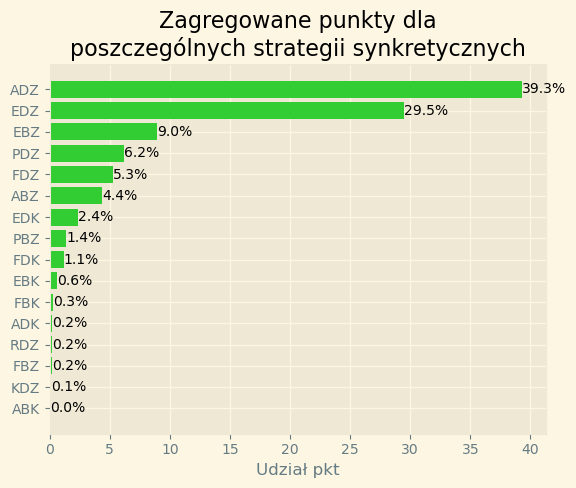

In [6]:
#Wyświetlenie sumy punktów dla poszczególnych strategii synkretycznych
#Display the total scores for each syncretistic strategy
pkt_synt_str = Zakończenie.groupby("Strategia synkretyczna")["Punkty"].sum().sort_values()
s_pkt_str = sum(pkt_synt_str)
pc_synt_str = (pkt_synt_str/s_pkt_str)*100
plt.style.use("Solarize_Light2")
w1=plt.barh(range(len(pc_synt_str)), pc_synt_str, color = "limegreen")
plt.bar_label(w1, fmt = "%.1f%%")
plt.yticks(range(len(pc_synt_str)), pc_synt_str.index)
plt.xlabel("Udział pkt")
plt.title("Zagregowane punkty dla\nposzczególnych strategii synkretycznych")
plt.show()

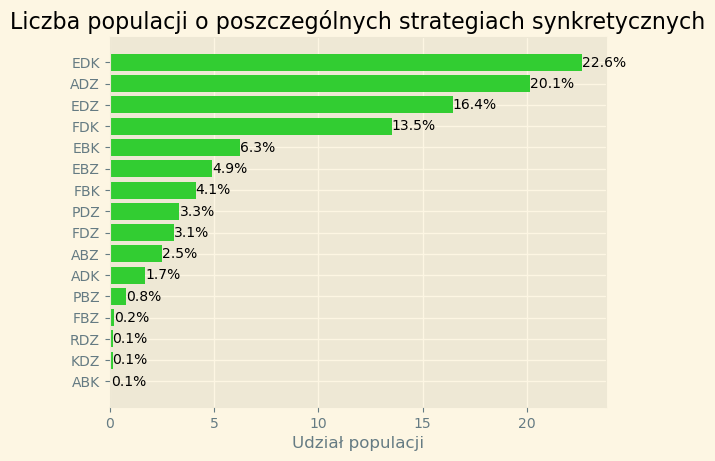

In [7]:
#Wyświetlenie liczby populacji o poszczególnych strategiach synkretycznych
#Display number of population for each syncretistic strategy
plt.clf()
gr_synt_str = Zakończenie.groupby("Strategia synkretyczna").size().sort_values()
s_gr_str = sum(gr_synt_str)
pc_gr_str = (gr_synt_str/s_gr_str)*100
plt.style.use("Solarize_Light2")
plt.style.use("Solarize_Light2")
w2=plt.barh(range(len(pc_gr_str)), pc_gr_str, color = "limegreen")
plt.bar_label(w2, fmt = "%.1f%%")
plt.yticks(range(len(pc_gr_str)), pc_gr_str.index)
plt.xlabel("Udział populacji")
plt.title("Liczba populacji o poszczególnych strategiach synkretycznych")
plt.show()

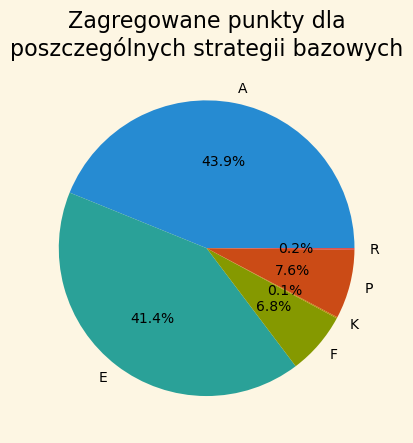

In [8]:
#Wyświetlenie sumy punktów dla poszczególnych strategii bazowych
#Display the total scores for each basic strategy
plt.clf()
pkt_strategie = Zakończenie.groupby("Strategia bazowa")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_strategie, labels=pkt_strategie.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla\nposzczególnych strategii bazowych")
plt.show()

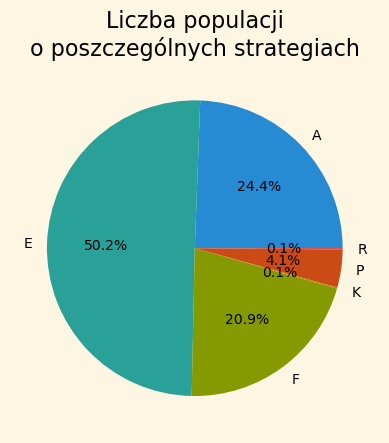

In [9]:
#Wyświetlenie liczby populacji dla poszczególnych strategii bazowych
#Display number of population for each basic strategy
plt.clf()
gr_strategie = Zakończenie.groupby("Strategia bazowa").size()
plt.pie(gr_strategie, labels=gr_strategie.index, autopct="%1.1f%%")
plt.title("Liczba populacji\no poszczególnych strategiach")
plt.show()

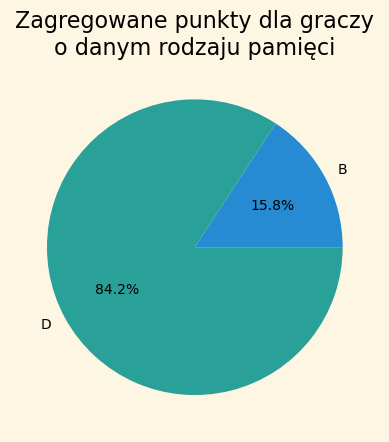

In [10]:
#Wyświetlanie sumy punktów dla poszczególnych pamięci
#Displaying point totals for each memories
plt.clf()
pkt_pamięć = Zakończenie.groupby("Pamięć")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_pamięć, labels=pkt_pamięć.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla graczy\no danym rodzaju pamięci")
plt.show()

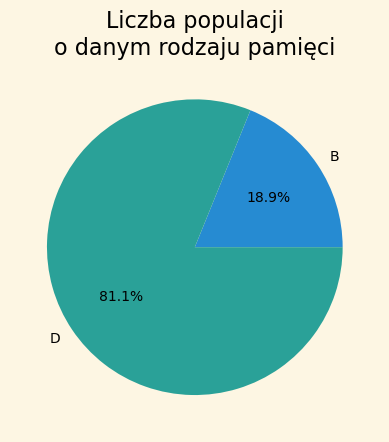

In [11]:
#Wyświetlanie populacji dla poszczególnych pamięci
#Population display for each memories
plt.clf()
gr_pamięć = Zakończenie.groupby("Pamięć").size()
plt.style.use("Solarize_Light2")
plt.pie(gr_pamięć, labels=gr_pamięć.index, autopct="%1.1f%%")
plt.title("Liczba populacji\no danym rodzaju pamięci")
plt.show()

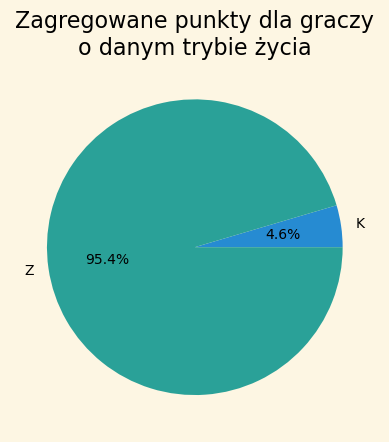

In [12]:
#Wyświetlanie sumy punktów dla poszczególnych trybów życia
#Display of point totals for each lifestyle
plt.clf()
pkt_tryb = Zakończenie.groupby("Tryb życia")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_tryb, labels=pkt_tryb.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla graczy\no danym trybie życia")
plt.show()

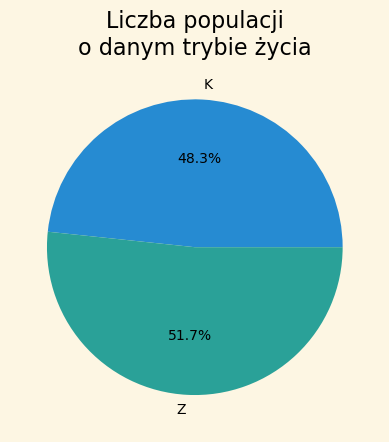

In [13]:
#Wyświetlanie populacji dla poszczególnych trybów życia
#Population display for specific lifestyles
plt.clf()
gr_tryb = Zakończenie.groupby("Tryb życia").size()
plt.style.use("Solarize_Light2")
plt.pie(gr_tryb, labels=gr_tryb.index, autopct="%1.1f%%")
plt.title("Liczba populacji\no danym trybie życia")
plt.show()

In [14]:
#Zapisanie wyników rund dla populacji żywej
#Saving the results of rounds for the living population
zmiany = Wyniki_rund[Wyniki_rund["Status"] == "Ż"]
zmiany

,Indeks,Strategia bazowa,Pamięć,Tryb życia,Punkty,Wiek,Status,Fenotyp A,Fenotyp B,Lokalizacja,Powód śmierci,Runda,Strategia synkretyczna
0,0,E,D,Z,147.10,1,Ż,0.000000,100.000000,0,,0,EDZ
1,1,A,B,K,130.10,1,Ż,0.000000,100.000000,2,,0,ABK
2,2,A,D,Z,110.11,1,Ż,100.000000,0.000000,0,,0,ADZ
3,3,A,D,Z,100.10,1,Ż,0.000000,100.000000,0,,0,ADZ
4,4,F,B,K,177.11,1,Ż,0.000000,100.000000,0,,0,FBK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14861,1562,E,B,K,100.00,0,Ż,36.230469,63.769531,2,,30,EBK
14862,1563,F,D,K,100.00,0,Ż,39.843750,60.156250,2,,30,FDK
14863,1564,F,B,K,100.00,0,Ż,36.621094,63.378906,2,,30,FBK
14864,1565,E,D,K,100.00,0,Ż,34.765625,65.234375,2,,30,EDK


In [15]:
zmiany_k = zmiany[zmiany["Strategia bazowa"] == "K"].groupby("Runda")["Punkty"].sum()
zmiany_e = zmiany[zmiany["Strategia bazowa"] == "E"].groupby("Runda")["Punkty"].sum()
zmiany_p = zmiany[zmiany["Strategia bazowa"] == "P"].groupby("Runda")["Punkty"].sum()
zmiany_r = zmiany[zmiany["Strategia bazowa"] == "R"].groupby("Runda")["Punkty"].sum()
zmiany_f = zmiany[zmiany["Strategia bazowa"] == "F"].groupby("Runda")["Punkty"].sum()
zmiany_a = zmiany[zmiany["Strategia bazowa"] == "A"].groupby("Runda")["Punkty"].sum()

In [16]:
zmiany_k = zmiany_k.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_e = zmiany_e.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_p = zmiany_p.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_r = zmiany_r.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_f = zmiany_f.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_a = zmiany_a.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)

In [17]:
suma = [sum(x) for x in zip(zmiany_k, zmiany_e, zmiany_p, zmiany_r, zmiany_f, zmiany_a)]
procent_zmiany_k = [100 * x / suma[i] for i, x in enumerate(zmiany_k)]
procent_zmiany_e = [100 * x / suma[i] for i, x in enumerate(zmiany_e)]
procent_zmiany_p = [100 * x / suma[i] for i, x in enumerate(zmiany_p)]
procent_zmiany_r = [100 * x / suma[i] for i, x in enumerate(zmiany_r)]
procent_zmiany_f = [100 * x / suma[i] for i, x in enumerate(zmiany_f)]
procent_zmiany_a = [100 * x / suma[i] for i, x in enumerate(zmiany_a)]

In [18]:
r_min = min(zmiany["Runda"])
r_max = max(zmiany["Runda"])

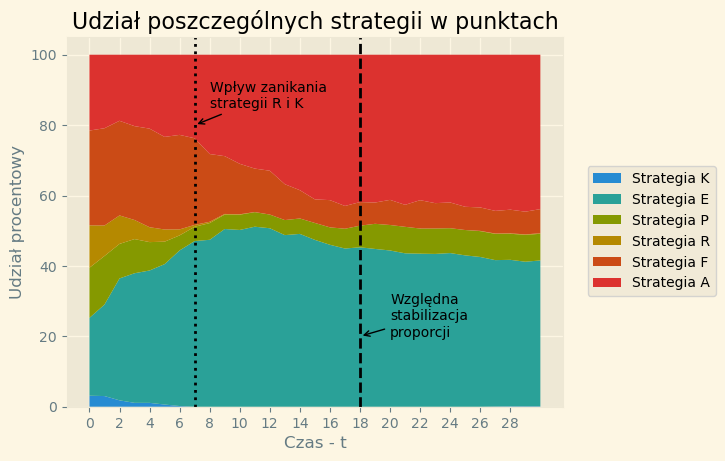

In [19]:
plt.clf()
plt.style.use("Solarize_Light2")
plt.stackplot(range(r_max+1),
                    procent_zmiany_k, procent_zmiany_e, procent_zmiany_p, procent_zmiany_r, procent_zmiany_f, procent_zmiany_a,
              labels=["Strategia K", "Strategia E", "Strategia P", "Strategia R", "Strategia F", "Strategia A"])
plt.legend(loc=[1.05,0.3])
plt.xlabel("Czas - t")
plt.xticks(range(r_min, r_max, 2))
plt.axvline(x=18, color = "black", linestyle = "--")
plt.axvline(x=7, color = "black", linestyle = ":")
plt.annotate("Wpływ zanikania\nstrategii R i K", xy=(7, 80), xytext=(8, 85),
             arrowprops=dict(arrowstyle="->"))
plt.annotate("Względna\nstabilizacja\nproporcji", xy=(18, 20), xytext=(20, 20),
             arrowprops=dict(arrowstyle="->"))
plt.ylabel("Udział procentowy")
plt.title("Udział poszczególnych strategii w punktach")
plt.show()

In [20]:
zmiany_zak = zmiany[zmiany["Tryb życia"] == "Z"].groupby("Runda")["Punkty"].sum()
zmiany_koc = zmiany[zmiany["Tryb życia"] == "K"].groupby("Runda")["Punkty"].sum()

In [21]:
zmiany_zak = zmiany_zak.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_koc = zmiany_koc.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)

In [22]:
suma = [sum(x) for x in zip(zmiany_zak, zmiany_koc)]
procent_zmiany_zak = [100 * x / suma[i] for i, x in enumerate(zmiany_zak)]
procent_zmiany_koc = [100 * x / suma[i] for i, x in enumerate(zmiany_koc)]

In [23]:
kum = procent_zmiany_zak.index(max(procent_zmiany_zak))
pop = zmiany.groupby("Runda")["Indeks"].count()

<Figure size 640x480 with 0 Axes>

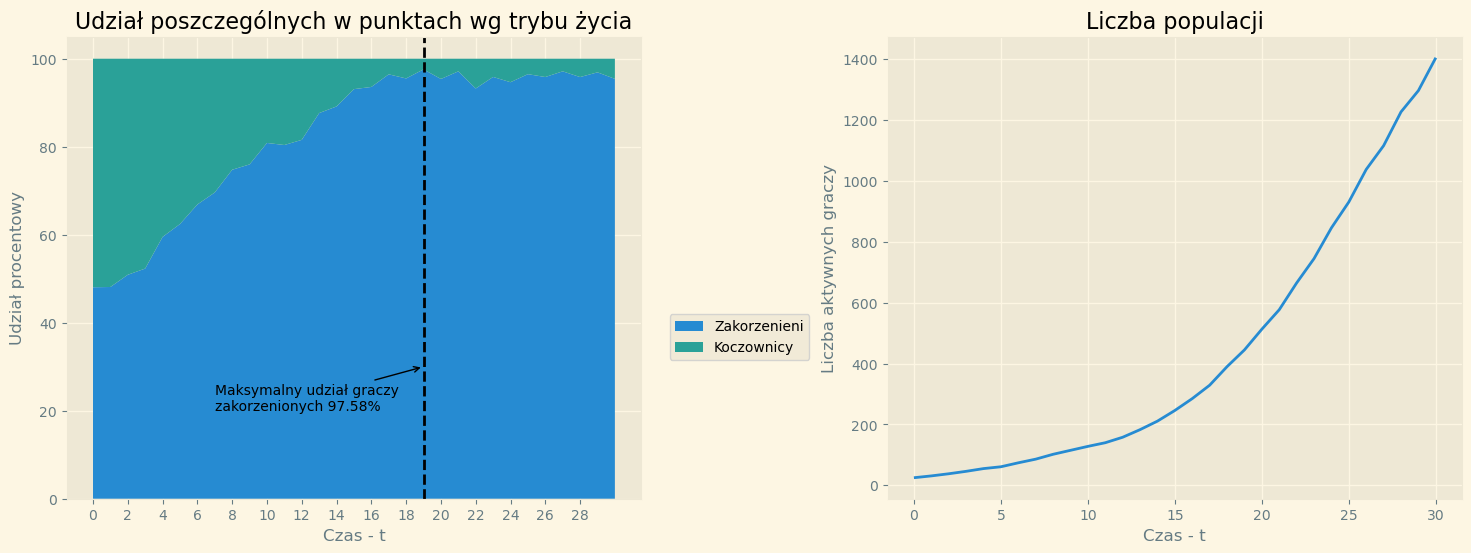

In [24]:
#Wykres 1
plt.clf()
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.style.use("Solarize_Light2")
plt.stackplot(range(r_max+1), procent_zmiany_zak, procent_zmiany_koc,
              labels=["Zakorzenieni","Koczownicy"])
plt.legend(loc=[1.05,0.3])
plt.xlabel("Czas - t")
plt.xticks(range(0, r_max, 2))
plt.axvline(x=kum, color = "black", linestyle = "--")
plt.annotate(f"Maksymalny udział graczy\nzakorzenionych {round(procent_zmiany_zak[kum], 2)}%",
             xy=(kum, 30), xytext=(7, 20),
             arrowprops=dict(arrowstyle="->"))
plt.ylabel("Udział procentowy")
plt.title("Udział poszczególnych w punktach wg trybu życia")

#Wykres 2
plt.subplot(1,2,2)
plt.style.use("Solarize_Light2")
plt.plot(range(r_max+1), pop)
plt.ylabel("Liczba aktywnych graczy")
plt.xlabel("Czas - t")
plt.title("Liczba populacji")

plt.subplots_adjust(wspace=0.43)
plt.show()

#### Dane dla poszczególnych lokalizacji:

<Figure size 640x480 with 0 Axes>

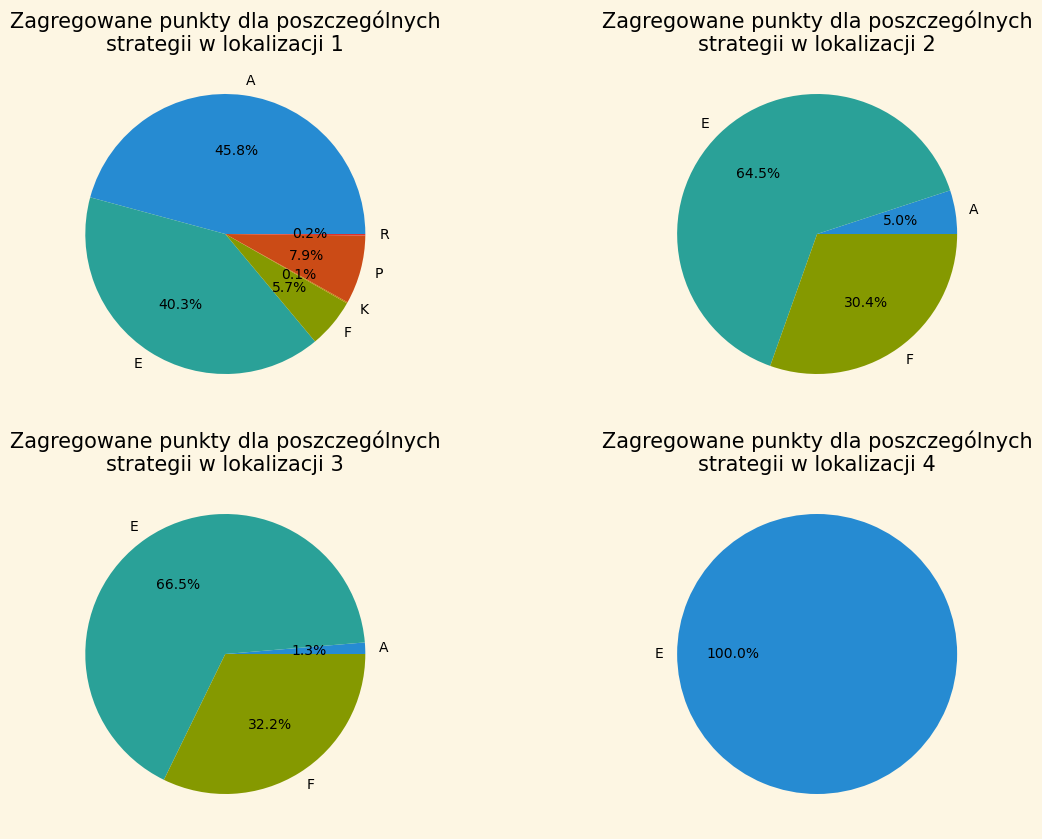

In [25]:
plt.clf()
plt.figure(figsize = (14,10))
#Wykres dla lokalizacji 1
plt.subplot(2,2,1)
pkt_strategie_1 = Zakończenie[Zakończenie["Lokalizacja"] == 0]
pkt_strategie_1 = pkt_strategie_1.groupby("Strategia bazowa")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_strategie_1, labels=pkt_strategie_1.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla poszczególnych\nstrategii w lokalizacji 1", fontsize = 15)
#Wykres dla lokalizacji 2
plt.subplot(2,2,2)
pkt_strategie_2 = Zakończenie[Zakończenie["Lokalizacja"] == 1]
pkt_strategie_2 = pkt_strategie_2.groupby("Strategia bazowa")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_strategie_2, labels=pkt_strategie_2.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla poszczególnych\nstrategii w lokalizacji 2", fontsize = 15)
#Wykres dla lokalizacji 3
plt.subplot(2,2,3)
pkt_strategie_3 = Zakończenie[Zakończenie["Lokalizacja"] == 2]
pkt_strategie_3 = pkt_strategie_3.groupby("Strategia bazowa")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_strategie_3, labels=pkt_strategie_3.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla poszczególnych\nstrategii w lokalizacji 3", fontsize = 15)
#Wykres dla lokalizacji 4
plt.subplot(2,2,4)
pkt_strategie_4 = Zakończenie[Zakończenie["Lokalizacja"] == 3]
pkt_strategie_4 = pkt_strategie_4.groupby("Strategia bazowa")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_strategie_4, labels=pkt_strategie_4.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla poszczególnych\nstrategii w lokalizacji 4", fontsize = 15)
plt.show()

In [26]:
#Wykres zmian sumy punktów dla lokalizacji 2
#Chart of changes in total points for location 2.
zmiany_2 = zmiany[zmiany["Lokalizacja"] == 2]

In [27]:
zmiany_k_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "K"].groupby("Runda")["Punkty"].sum()
zmiany_e_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "E"].groupby("Runda")["Punkty"].sum()
zmiany_p_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "P"].groupby("Runda")["Punkty"].sum()
zmiany_r_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "R"].groupby("Runda")["Punkty"].sum()
zmiany_f_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "F"].groupby("Runda")["Punkty"].sum()
zmiany_a_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "A"].groupby("Runda")["Punkty"].sum()

In [28]:
zmiany_k_2 = zmiany_k_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)
zmiany_e_2 = zmiany_e_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)
zmiany_p_2 = zmiany_p_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)
zmiany_r_2 = zmiany_r_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)
zmiany_f_2 = zmiany_f_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)
zmiany_a_2 = zmiany_a_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)

In [29]:
suma_2 = [sum(x) for x in zip(zmiany_k_2, zmiany_e_2, zmiany_p_2, zmiany_r_2, zmiany_f_2, zmiany_a_2)]
procent_zmiany_k_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_k_2)]
procent_zmiany_e_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_e_2)]
procent_zmiany_p_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_p_2)]
procent_zmiany_r_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_r_2)]
procent_zmiany_f_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_f_2)]
procent_zmiany_a_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_a_2)]

<Figure size 640x480 with 0 Axes>

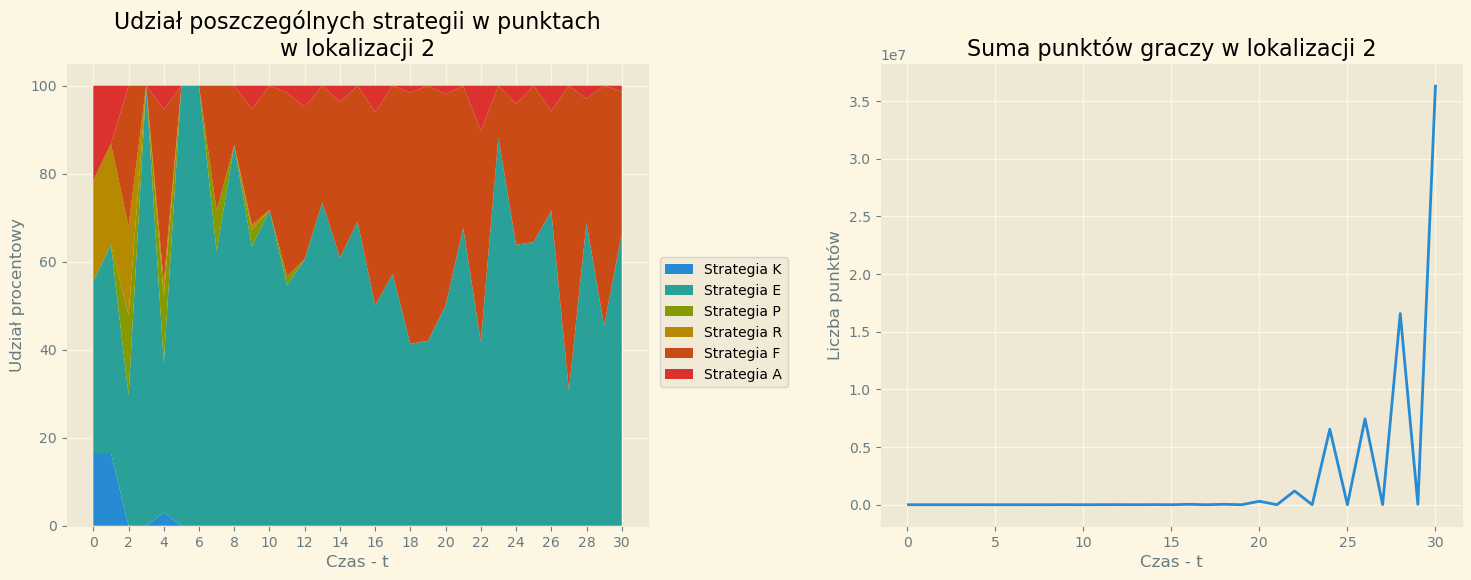

In [30]:
plt.clf()
plt.figure(figsize = (18,6))
#Wykres 1
plt.subplot(1,2,1)
plt.style.use("Solarize_Light2")
plt.stackplot(range(r_max+1), procent_zmiany_k_2, procent_zmiany_e_2, procent_zmiany_p_2, procent_zmiany_r_2, procent_zmiany_f_2, procent_zmiany_a_2,
              labels=["Strategia K","Strategia E", "Strategia P", "Strategia R", "Strategia F", "Strategia A"])
plt.legend(loc=[1.02,0.3])
plt.xlabel("Czas - t")
plt.xticks(range(0, r_max+1, 2))
plt.ylabel("Udział procentowy")
plt.title("Udział poszczególnych strategii w punktach\nw lokalizacji 2")
#Wykres 2
plt.subplot(1,2,2)
plt.style.use("Solarize_Light2")
plt.plot(range(r_max+1), suma_2)
plt.ylabel("Liczba punktów")
plt.xlabel("Czas - t")
plt.title("Suma punktów graczy w lokalizacji 2")

plt.subplots_adjust(wspace=0.4)
plt.show()